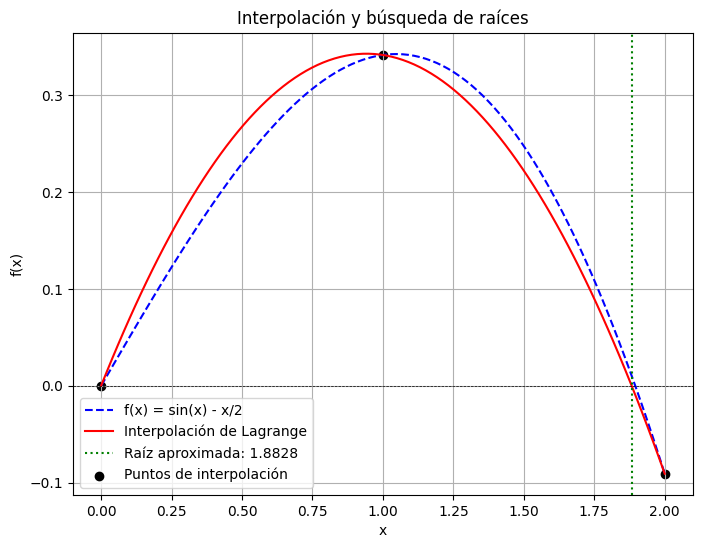

La raíz aproximada usando interpolación es: 1.8828
Iteraciones del método de bisección:
Iteración 1: x = 1.000000
Iteración 2: x = 1.500000
Iteración 3: x = 1.750000
Iteración 4: x = 1.875000
Iteración 5: x = 1.937500
Iteración 6: x = 1.906250
Iteración 7: x = 1.890625
Iteración 8: x = 1.882812
Iteración 9: x = 1.878906
Iteración 10: x = 1.880859
Iteración 11: x = 1.881836
Iteración 12: x = 1.882324
Iteración 13: x = 1.882568
Iteración 14: x = 1.882690
Iteración 15: x = 1.882751
Iteración 16: x = 1.882782
Iteración 17: x = 1.882767
Iteración 18: x = 1.882759

Error absoluto: 0.012741
Error relativo: 0.006722
Error cuadrático: 0.000162


In [1]:
#   Codigo que implementa el esquema numerico
#   de interpolacion para determinar la raiz de
#   una ecuacion
#
#           Autor:
#   Kimberly Miranda Rosel
#   kimberlymiranda080805@gmail.com
#   Version 2.0 : 13/02/2025

import numpy as np
import matplotlib.pyplot as plt

# Función original
def f(x):
    return np.sin(x) - x / 2

# Interpolación de Lagrange
def lagrange_interpolation(x, x_points, y_points):
    n = len(x_points)
    result = 0
    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result

# Método de Bisección
def bisect(func, a, b, tol=1e-6, max_iter=100):
    iterations = []  # Para guardar las iteraciones
    if func(a) * func(b) > 0:
        raise ValueError("El intervalo no contiene una raíz")

    for iter_count in range(max_iter):
        c = (a + b) / 2
        iterations.append(c)
        if abs(func(c)) < tol or (b - a) / 2 < tol:
            return c, iterations
        if func(a) * func(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2, iterations  # Retorna la mejor estimación de la raíz

# Selección de tres puntos de interpolación
x0 = 0.0
x1 = 1.0
x2 = 2.0
x_points = np.array([x0, x1, x2])
y_points = f(x_points)

# Construcción del polinomio interpolante
x_vals = np.linspace(x0, x2, 100)
y_interp = [lagrange_interpolation(x, x_points, y_points) for x in x_vals]

# Encontrar raíz del polinomio interpolante usando bisección
root, iterations = bisect(lambda x: lagrange_interpolation(x, x_points, y_points), x0, x2)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f(x_vals), label="f(x) = sin(x) - x/2", linestyle='dashed', color='blue')
plt.plot(x_vals, y_interp, label="Interpolación de Lagrange", color='red')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(root, color='green', linestyle='dotted', label=f"Raíz aproximada: {root:.4f}")
plt.scatter(x_points, y_points, color='black', label="Puntos de interpolación")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Interpolación y búsqueda de raíces")
plt.legend()
plt.grid(True)
plt.savefig("interpolacion_raices_sin.png")  # Guarda la imagen
plt.show()

# Imprimir la raíz encontrada
print(f"La raíz aproximada usando interpolación es: {root:.4f}")

# Calcular e imprimir las iteraciones del método de bisección
print("Iteraciones del método de bisección:")
for i, val in enumerate(iterations):
    print(f"Iteración {i+1}: x = {val:.6f}")

# Calcular los errores
# Raíz exacta aproximada por la función
root_exact = 1.8955  # Usando un valor conocido o calculado para la raíz

# Error absoluto
error_abs = abs(root - root_exact)

# Error relativo
error_rel = error_abs / abs(root_exact)

# Error cuadrático
error_cuad = error_abs**2

# Imprimir los errores
print(f"\nError absoluto: {error_abs:.6f}")
print(f"Error relativo: {error_rel:.6f}")
print(f"Error cuadrático: {error_cuad:.6f}")
